<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
AgeGroup
0-10     0.593750
10-20    0.382609
20-30    0.365217
30-40    0.445161
40-50    0

C:\Users\cdh01\AppData\Local\Temp\ipykernel_28660\2068178241.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Survived"].mean())
C:\Users\cdh01\AppData\Local\Temp\ipykernel_28660\2068178241.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("FareGroup")["Survived"].mean())


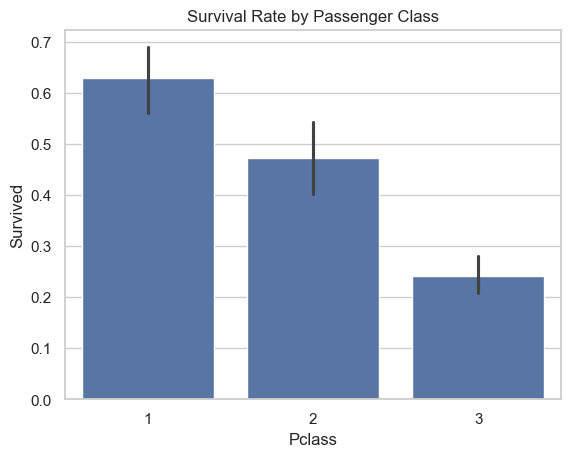

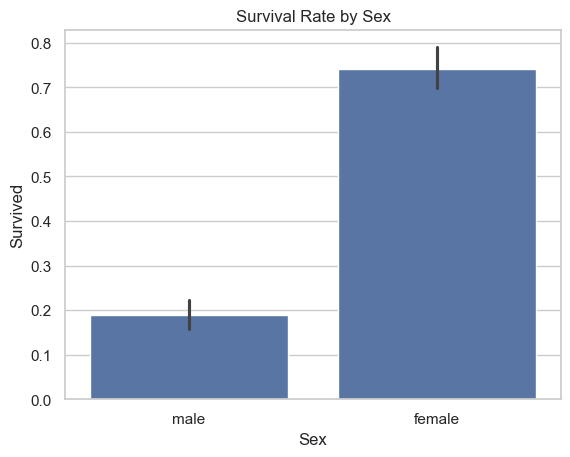

In [22]:
# Exploratory Data Analysis for Titanic Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:/Users/cdh01/Desktop/titanic-survival-prediction/data/train.csv")  

# Check basic info
df.info()
df.describe()
df.head()

# Check missing values
df.isnull().sum()

# Survival rate by class
print(df.groupby("Pclass")["Survived"].mean())

# Survival rate by sex
print(df.groupby("Sex")["Survived"].mean())

# Create binned features for visualization
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 100], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60+"])
df["FareGroup"] = pd.qcut(df["Fare"], q=4)

# Survival rate by age group and fare group
print(df.groupby("AgeGroup")["Survived"].mean())
print(df.groupby("FareGroup")["Survived"].mean())

# Visualization
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill any remaining missing values
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop unused columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)
df = pd.get_dummies(df, columns=["Pclass"], drop_first=True)

# Create new features
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Drop interval-type bins if they exist
df.drop(columns=["AgeGroup", "FareGroup"], inplace=True, errors="ignore")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (267504592.py, line 22)